### RFM ANALYSIS

RFM stands for Recency, Frequency and Monetary Value.
These metrics help provide information on customer engagement, loyalty and value to business.
This analysis helps understands customer characteristics and behaviour to segment them based on their buying behavior

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### IMPORTING THE DATA

In [6]:
df = pd.read_csv(r"C:\Users\LENOVO\Documents\Data Journey\Datasets\rfm_data.csv",
                parse_dates = ['PurchaseDate'])
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


In [10]:
df.isna().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [12]:
df.describe()

,CustomerID,PurchaseDate,TransactionAmount,OrderID
count,1000.000000,1000,1000.00000,1000.000000
mean,5554.789000,2023-05-10 07:27:50.400000,513.67781,554071.398000
min,1011.000000,2023-04-11 00:00:00,12.13000,100096.000000
25%,3273.000000,2023-04-26 00:00:00,257.12000,313152.000000
50%,5538.000000,2023-05-09 00:00:00,523.56500,564671.500000
75%,7821.750000,2023-05-26 00:00:00,759.86000,783052.250000
max,9991.000000,2023-06-10 00:00:00,999.44000,999695.000000
std,2605.014863,NaN,286.09870,264695.448814


##### CALCULATING RECENCY

To do this, we subtract the purchase date from a specified date say 2023-07-01.
This is because this will give us a more realistic value

In [41]:
s_date = '2023-07-01'

#type(date)

s_date =pd.to_datetime(s_date).date()

type(s_date)


datetime.date

In [99]:
from datetime import datetime

df['Rec'] = (s_date - df['PurchaseDate'].dt.date
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Rec
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,"81 days, 0:00:00"
1,2188,2023-04-11,463.70,Product A,176819,London,"81 days, 0:00:00"
2,4608,2023-04-11,80.28,Product A,340062,New York,"81 days, 0:00:00"
3,2559,2023-04-11,221.29,Product A,239145,London,"81 days, 0:00:00"
4,9482,2023-04-11,739.56,Product A,194545,Paris,"81 days, 0:00:00"


In [101]:
Recency = []
for i in df['Rec']:
    a = i.days
    Recency.append(a)

Recency

[81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 72,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 71,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,
 69,


In [103]:
df['Recency'] = Recency
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Rec,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,"81 days, 0:00:00",81
1,2188,2023-04-11,463.70,Product A,176819,London,"81 days, 0:00:00",81
2,4608,2023-04-11,80.28,Product A,340062,New York,"81 days, 0:00:00",81
3,2559,2023-04-11,221.29,Product A,239145,London,"81 days, 0:00:00",81
4,9482,2023-04-11,739.56,Product A,194545,Paris,"81 days, 0:00:00",81


In [105]:
df = df.drop(columns='Rec', axis=1)
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,81
1,2188,2023-04-11,463.70,Product A,176819,London,81
2,4608,2023-04-11,80.28,Product A,340062,New York,81
3,2559,2023-04-11,221.29,Product A,239145,London,81
4,9482,2023-04-11,739.56,Product A,194545,Paris,81


##### CALCULATING FREQUENCY

This is calculated by grouping the data by CustomerID and count the number of OrderID to know the number of purchses by a customer

In [110]:
frequency = (
    df
    .groupby('CustomerID')
    .agg({'OrderID': 'count'})
    .reset_index()
)

frequency.rename(columns = {'OrderID': 'Frequency'}, inplace = True)
frequency

,CustomerID,Frequency
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1
...,...,...
941,9941,1
942,9950,1
943,9954,1
944,9985,1


##### CALCULATING MONETARY VALUE

This is done by grouping by CustomerID and aggregating the sum of each TransactionAmount

In [113]:
monetary = (
    df
    .groupby('CustomerID')
    .agg({'TransactionAmount': 'sum'})
    .reset_index()
)
monetary.rename(columns = {'TransactionAmount': 'MonetaryValue'}, inplace = True)
monetary.head()

,CustomerID,MonetaryValue
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72


##### MERGING THE 2 DATAFRAMES WITH THE ORIGINAL DATASET

In [116]:
df = df.merge(frequency, on='CustomerID', how='left')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,81,1
1,2188,2023-04-11,463.70,Product A,176819,London,81,1
2,4608,2023-04-11,80.28,Product A,340062,New York,81,1
3,2559,2023-04-11,221.29,Product A,239145,London,81,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,81,1


In [120]:
df = df.merge(monetary, on='CustomerID', how='left')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,81,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,81,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,81,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,81,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,81,1,739.56


POINTS TO NOTE

1. THE LOWER THE RECENCY VALUE, THE MORE RECENT A PURCHASE WAS MADE HENCE A HIGHER RECENCY RATE
2. THE HIGHER THE FREQUENCY VALUE, THE HIGHER THE FREQUENCY SCORE AND VICE VERSA
3. THE HIGHER THE MONETARY VALUE, THE HIGHER THE MONETARY SCORE

From this we can now give a recency score, frequency score and monetary value score to bin the dataset

In [124]:
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]

In [126]:
#pd.cut is used to bin datset or segment them based on a range of values or bins

df['RecencyScore'] = pd.cut(x=df['Recency'], bins=5, labels = recency_scores)
df['FrequencyScore'] = pd.cut(x=df['Frequency'], bins=5, labels = frequency_scores)
df['MonetaryScore'] = pd.cut(x=df['MonetaryValue'], bins=5, labels = monetary_scores)

In [128]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,81,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,81,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,81,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,81,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,81,1,739.56,1,1,2


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   category      
 10  FrequencyScore      1000 non-null   category      
 11  MonetaryScore       1000 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 74.0+ KB


We have to convert the score columns to integers form categorical datatypes to enable us calculate our RFM score and other variables

In [135]:
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

NOW WE CAN CALCULATE OUR RFM SCORE AND SEGMENT THEM INTO 3 (LOW, MID AND HIGH)

In [138]:
df['RFMScore'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,81,1,943.31,1,1,2,4
1,2188,2023-04-11,463.70,Product A,176819,London,81,1,463.70,1,1,1,3
2,4608,2023-04-11,80.28,Product A,340062,New York,81,1,80.28,1,1,1,3
3,2559,2023-04-11,221.29,Product A,239145,London,81,1,221.29,1,1,1,3
4,9482,2023-04-11,739.56,Product A,194545,Paris,81,1,739.56,1,1,2,4


In [141]:
segments = ['Low_Value', 'Mid_Value', 'High_Value']


#pd.qcut
#Quantile-based discretization function.

#Discretize variable into equal-sized buckets based on rank or based
#on sample quantiles. For example 1000 values for 10 quantiles would
#produce a Categorical object indicating quantile membership for each data point.
#like pd.cut
df['RFMSegments'] = pd.qcut(x= df['RFMScore'], q = 3, labels = segments)
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,RFMSegments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,81,1,943.31,1,1,2,4,Low_Value
1,2188,2023-04-11,463.70,Product A,176819,London,81,1,463.70,1,1,1,3,Low_Value
2,4608,2023-04-11,80.28,Product A,340062,New York,81,1,80.28,1,1,1,3,Low_Value
3,2559,2023-04-11,221.29,Product A,239145,London,81,1,221.29,1,1,1,3,Low_Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,81,1,739.56,1,1,2,4,Low_Value


In [152]:
rfm_df = df['RFMSegments'].value_counts().reset_index()
rfm_df.rename(columns = {'count': 'Count'}, inplace = True)
rfm_df

,RFMSegments,Count
0,Low_Value,435
1,Mid_Value,386
2,High_Value,179


We can still categorize the segments into more categories to determiine customer behavior and characteristics.

We will use categories or segments such as 'Champions', 'Potential Loyalits', 'Can't Lose'

In [164]:
df['CustomerSegment'] = ''

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,RFMSegments,CustomerSegment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,81,1,943.31,1,1,2,4,Low_Value,
1,2188,2023-04-11,463.70,Product A,176819,London,81,1,463.70,1,1,1,3,Low_Value,
2,4608,2023-04-11,80.28,Product A,340062,New York,81,1,80.28,1,1,1,3,Low_Value,
3,2559,2023-04-11,221.29,Product A,239145,London,81,1,221.29,1,1,1,3,Low_Value,
4,9482,2023-04-11,739.56,Product A,194545,Paris,81,1,739.56,1,1,2,4,Low_Value,


In [170]:
df.loc[df['RFMScore'] >= 9, 'CustomerSegment'] = 'Champions'
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,RFMSegments,CustomerSegment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,81,1,943.31,1,1,2,4,Low_Value,
1,2188,2023-04-11,463.70,Product A,176819,London,81,1,463.70,1,1,1,3,Low_Value,
2,4608,2023-04-11,80.28,Product A,340062,New York,81,1,80.28,1,1,1,3,Low_Value,
3,2559,2023-04-11,221.29,Product A,239145,London,81,1,221.29,1,1,1,3,Low_Value,
4,9482,2023-04-11,739.56,Product A,194545,Paris,81,1,739.56,1,1,2,4,Low_Value,


In [176]:
df.loc[df['RFMScore'] < 9, 'CustomerSegment'] = 'Potential Loyalists'
df.loc[df['RFMScore'] < 6, 'CustomerSegment'] = 'At Risk Customers'
df.loc[df['RFMScore'] < 5, 'CustomerSegment'] = "Can't Lose"
df.loc[df['RFMScore'] < 4, 'CustomerSegment'] = 'Lost'

In [180]:
custrfm_segments = df.groupby(['RFMSegments', 'CustomerSegment']).size().reset_index(name = 'Count')
custrfm_segments

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13328\614227745.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,RFMSegments,CustomerSegment,Count
0,Low_Value,At Risk Customers,180
1,Low_Value,Can't Lose,173
2,Low_Value,Champions,0
3,Low_Value,Lost,82
4,Low_Value,Potential Loyalists,0
5,Mid_Value,At Risk Customers,0
6,Mid_Value,Can't Lose,0
7,Mid_Value,Champions,0
8,Mid_Value,Lost,0
9,Mid_Value,Potential Loyalists,386


#### VISUALIZING OUR ANALYSIS

In [144]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = 'plotly_white'

RFM SEGMENT DISTRIBUTION

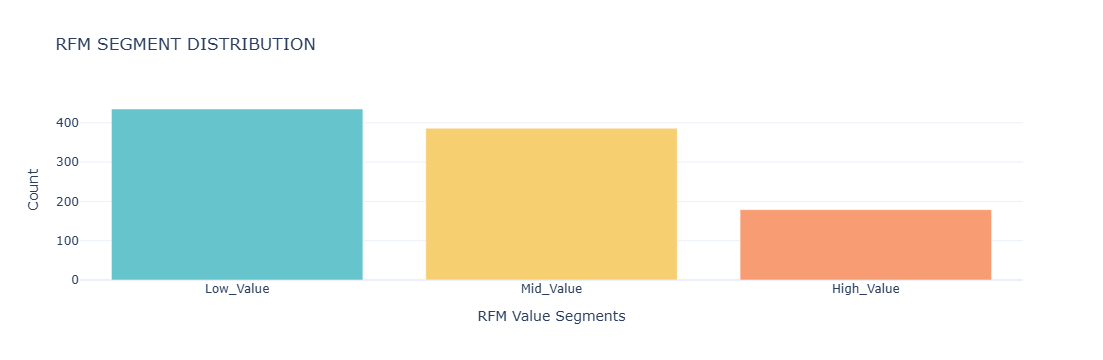

In [183]:
pastel_colors = px.colors.qualitative.Pastel

#creating a barchart
fig_seg_dist = px.bar(rfm_df, x = 'RFMSegments', y = 'Count', 
                      color='RFMSegments', color_discrete_sequence = pastel_colors,
                      title = 'RFM SEGMENT DISTRIBUTION')

#update layout
fig_seg_dist.update_layout(xaxis_title = 'RFM Value Segments',
                           showlegend = False)

fig_seg_dist.show()

CUSTOMER AND RFM SEGMENT RELATIONSHIP

C:\Users\LENOVO\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\LENOVO\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



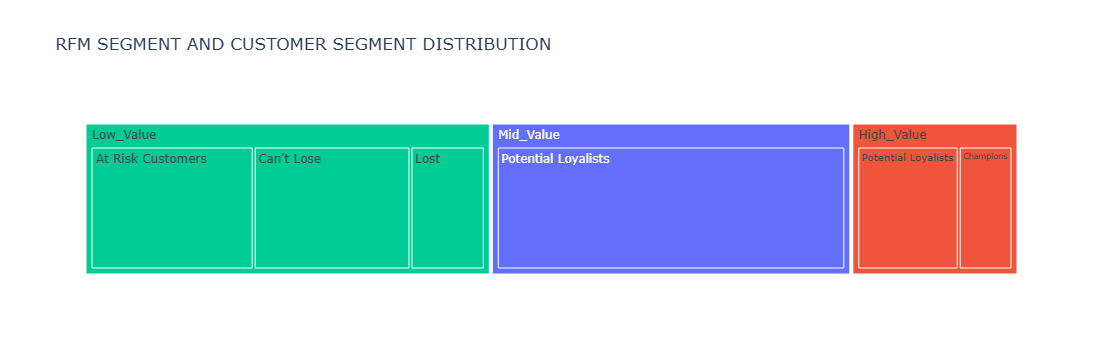

In [199]:
fig = go.Figure()

tree_map = px.treemap(custrfm_segments, 
                      path = ['RFMSegments', 'CustomerSegment'],
                      values= 'Count',
                      color = 'RFMSegments',
                      title = 'RFM SEGMENT AND CUSTOMER SEGMENT DISTRIBUTION'
                     )

tree_map.show()

DISTRIBUTION OF RFM VALUES WITHIN THE CHAMPION CUSTOMERS

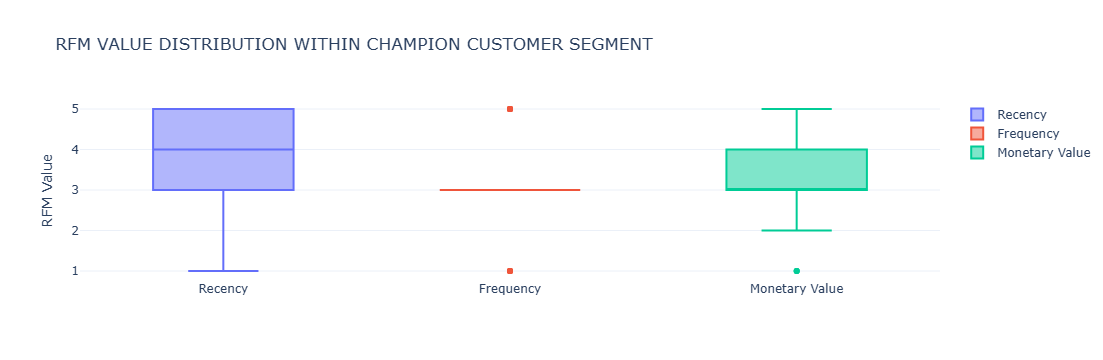

In [208]:
champions = df[df['CustomerSegment'] == 'Champions']

#creating a figure
fig = go.Figure()

#creating 3 different box plots
fig.add_trace(go.Box(y = champions['RecencyScore'], name = 'Recency'))
fig.add_trace(go.Box(y = champions['FrequencyScore'], name= 'Frequency'))
fig.add_trace(go.Box(y = champions['MonetaryScore'], name = 'Monetary Value'))

fig.update_layout(title = 'RFM VALUE DISTRIBUTION WITHIN CHAMPION CUSTOMER SEGMENT',
                  yaxis_title = 'RFM Value'
                 )

fig.show()

CORRELATION OF THE RFM VALUES IN THE CHAMPION SEGMENT

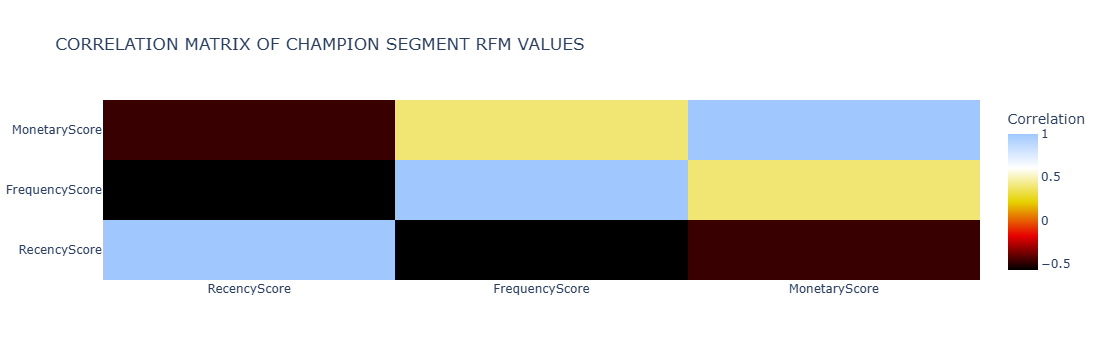

In [221]:
cham_matrix = champions[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

#creating a heatmap
heat_map = go.Figure(
    data = go.Heatmap(
        z = cham_matrix.values,
        x = cham_matrix.columns,
        y = cham_matrix.columns,
        colorscale = 'Blackbody',
        colorbar = dict(title ='Correlation')
    )
)

heat_map.update_layout(title = 'CORRELATION MATRIX OF CHAMPION SEGMENT RFM VALUES')

heat_map.show()

NUMBER OF CUSTOMERS IN ALL SEGMENTS

In [238]:
seg_counts = df['CustomerSegment'].value_counts().reset_index()
seg_counts.rename(columns = {'count': 'Count'}, inplace = True)
seg_counts

,CustomerSegment,Count
0,Potential Loyalists,503
1,At Risk Customers,180
2,Can't Lose,173
3,Lost,82
4,Champions,62


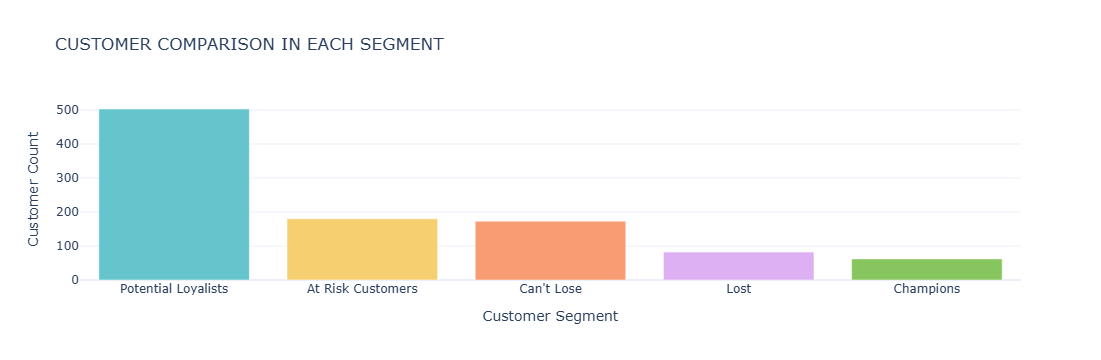

In [244]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

#creating barchart
fig = go.Figure(data = [go.Bar(x=seg_counts['CustomerSegment'], y = seg_counts['Count'],
                               marker = dict(color = pastel_colors)
                              )
                       ]
               )
fig.update_layout(title = 'CUSTOMER COMPARISON IN EACH SEGMENT',
                  xaxis_title = 'Customer Segment',
                  yaxis_title = 'Customer Count'
                 )

fig.show()

COMPARING THE RFM VALUES OF EACH SEGMENT

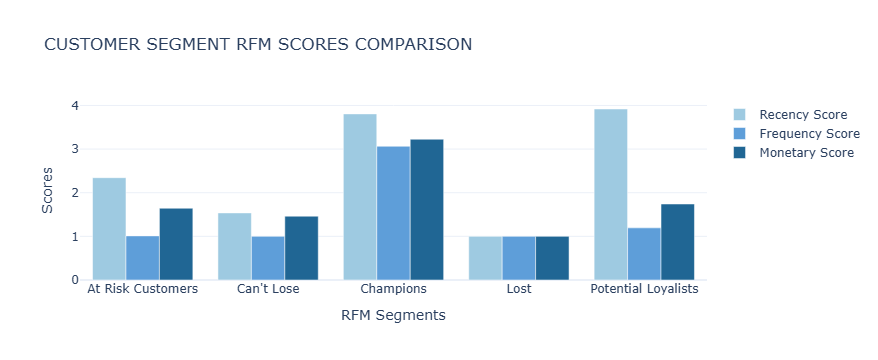

In [259]:
customer_rfm = df.groupby('CustomerSegment')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

#grouped barchart
fig = go.Figure()

fig.add_trace(go.Bar(
    x = customer_rfm['CustomerSegment'],
    y = customer_rfm['RecencyScore'],
    name = 'Recency Score',
    marker_color = 'rgb(158, 202, 225)'
    )
)

fig.add_trace(go.Bar(
    x = customer_rfm['CustomerSegment'],
    y = customer_rfm['FrequencyScore'],
    name = 'Frequency Score',
    marker_color = 'rgb(94, 158, 217)'
    )
)

fig.add_trace(go.Bar(
    x = customer_rfm['CustomerSegment'],
    y = customer_rfm['MonetaryScore'],
    name = 'Monetary Score',
    marker_color = 'rgb(32, 102, 148)'
    )
)

fig.update_layout(
    title = 'CUSTOMER SEGMENT RFM SCORES COMPARISON',
    xaxis_title = 'RFM Segments',
    yaxis_title = 'Scores'
)

fig.show()